In [2]:
%reset -f
import sys
import numpy as np
sys.path.insert(0, '..')
from wavhandler import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
from utils_train import *
import deepdish as dd
import os
import glob
from natsort import natsorted
import matplotlib.pyplot as plt
print(os.listdir(BASE_DIR))
sns.set()

['Exp_swd_dmel_4', 'Leafminers', 'Wingbeats', 'Exp_swd_dmel_2', 'Exp_swd_dmel_1', 'Pcfruit', 'Thomas', 'LG', 'Exp_swd_dm_before', 'Exp_swd_dmel_3']


In [3]:
def compare_combinations(data1=None, data2=None, species1=None, species2=None):    
    dataset1 = Dataset(data1)
    dataset1.read(data=species1,loadmat=False)
    dataset1.make_array(setting='psd_dB');
    x1 = dataset1.psd_dB
    dataset2 = Dataset(data2)
    dataset2.read(data=species2,loadmat=False)
    dataset2.make_array(setting='psd_dB');
    x2 = dataset2.psd_dB
    y1 = dataset1.y.apply(lambda x: f'{x}_1')
    y2 = dataset2.y.apply(lambda x: f'{x}_2')
    
    return x1,x2,y1,y2

## SUZUKII DATA FROM DIFFERENT SENSORS

In [4]:
freqs = np.linspace(0,4092,129)

Species: D. suzukii.
Read 600 filenames in 0.01 seconds.
Species: D. suzukii.
Read 1000 filenames in 0.01 seconds.


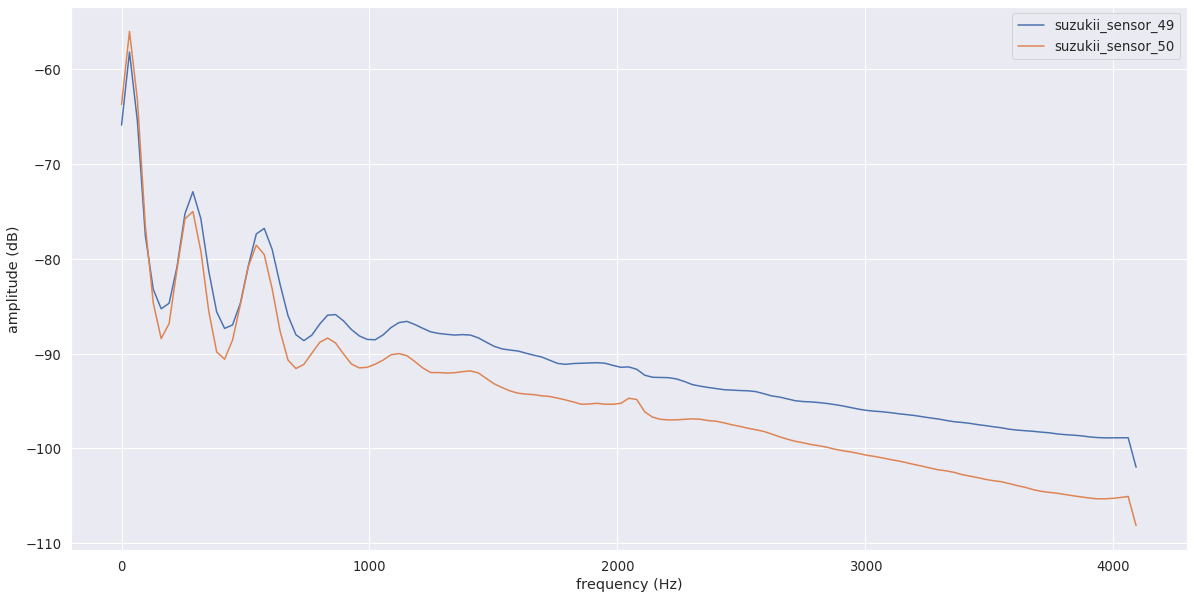

In [70]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_3', species1='D. suzukii', species2='D. suzukii')

plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x2.mean(), "frequency (Hz)":freqs}))
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x1.mean(), "frequency (Hz)":freqs}))

plt.legend(['suzukii_sensor_49','suzukii_sensor_50'])

## MELANOGASTER DATA FROM DIFFERENT SENSORS

Species: D. melanogaster.
Read 600 filenames in 0.01 seconds.
Species: D. melanogaster.
Read 1000 filenames in 0.01 seconds.


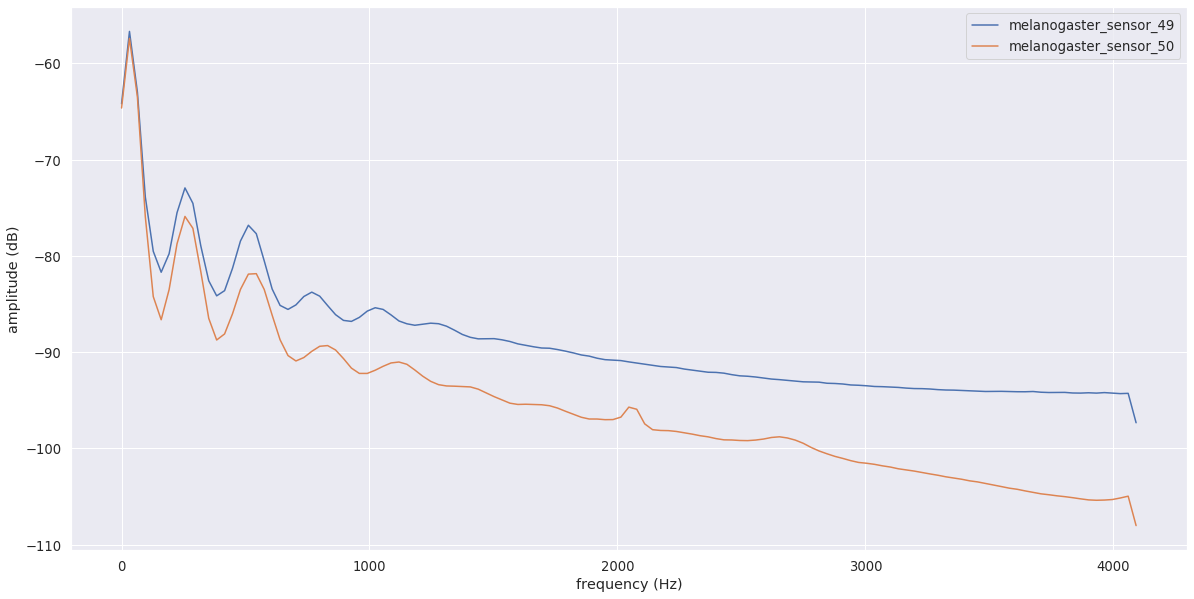

In [6]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_3', species1='D. melanogaster', species2='D. melanogaster')

plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x1.mean(), "frequency (Hz)":freqs}))
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x2.mean(), "frequency (Hz)":freqs}))
plt.legend(['melanogaster_sensor_49','melanogaster_sensor_50'])

## Melanogaster vs Suzukii same sensor

Species: D. melanogaster.
Read 1000 filenames in 0.01 seconds.
Species: D. suzukii.
Read 600 filenames in 0.01 seconds.


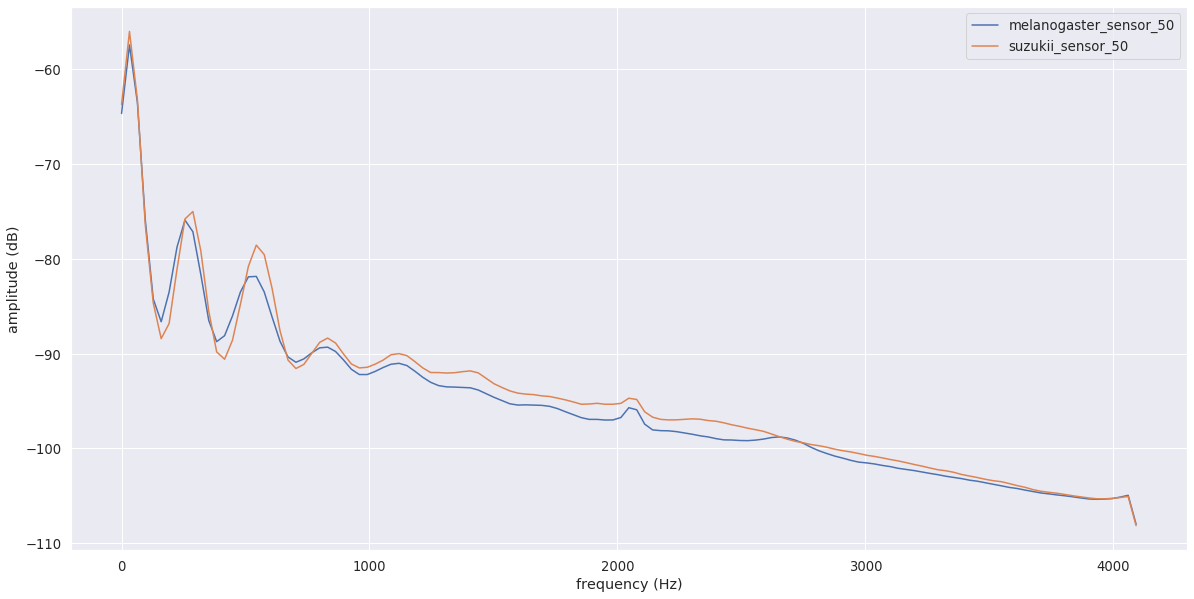

In [7]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_3', data2='Exp_swd_dmel_1', species1='D. melanogaster', species2='D. suzukii')

plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x1.mean(), "frequency (Hz)":freqs}))
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x2.mean(), "frequency (Hz)":freqs}))
plt.legend(['melanogaster_sensor_50','suzukii_sensor_50'])

## Melanogaster vs Suzukii different sensor (first combination)

Species: D. melanogaster.
Read 600 filenames in 0.01 seconds.
Species: D. suzukii.
Read 600 filenames in 0.01 seconds.


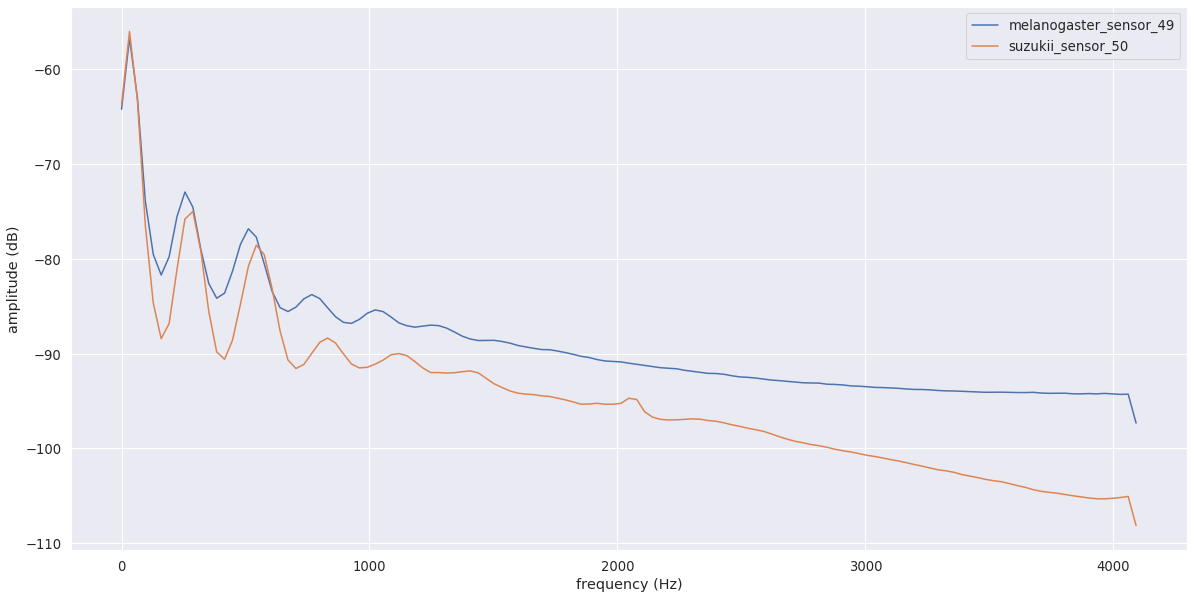

In [8]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_1', species1='D. melanogaster', species2='D. suzukii')

plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x1.mean(), "frequency (Hz)":freqs}))
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x2.mean(), "frequency (Hz)":freqs}))
plt.legend(['melanogaster_sensor_49','suzukii_sensor_50'])

## Suzukii vs Suzukii same sensor, different trial

Species: D. suzukii.
Read 600 filenames in 0.01 seconds.
Species: D. suzukii.
Read 630 filenames in 0.03 seconds.


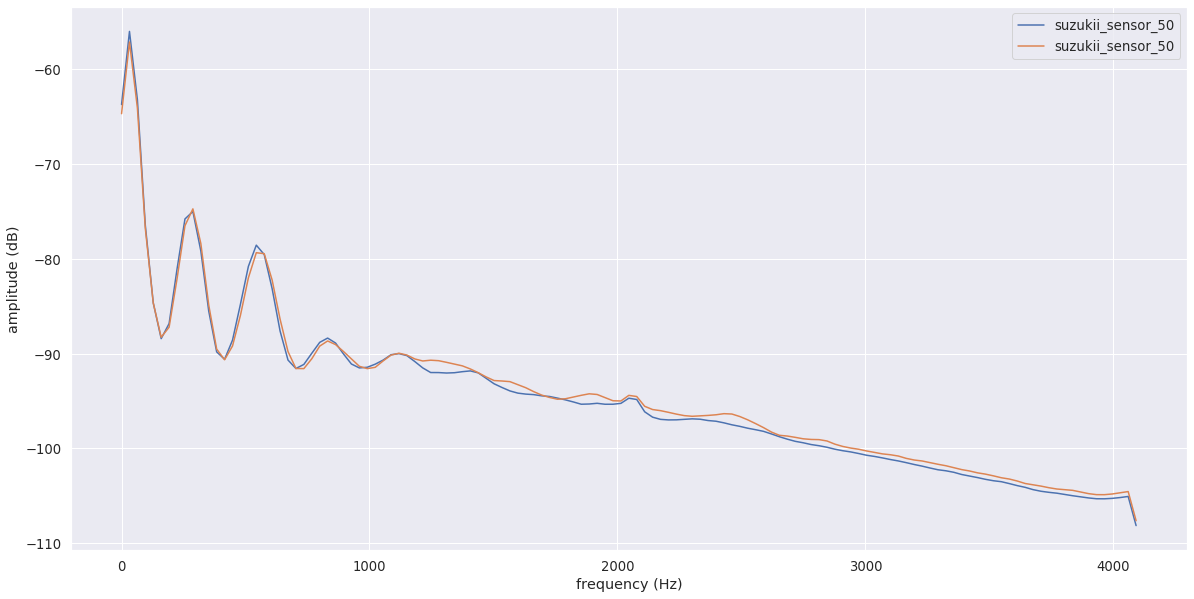

In [9]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_2', species1='D. suzukii', species2='D. suzukii')

plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x1.mean(), "frequency (Hz)":freqs}))
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x2.mean(), "frequency (Hz)":freqs}))
plt.legend(['suzukii_sensor_50','suzukii_sensor_50'])

## Checking combination 4

Species: D. suzukii.
Read 970 filenames in 0.01 seconds.
Species: D. melanogaster.
Read 980 filenames in 0.01 seconds.


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-0.814099,-0.34887,-1.465443,-0.566803,2.51493,2.653419,-0.683377,-2.677138,0.111077,4.509965,...,11.064629,11.125425,11.197485,11.263191,11.281725,11.300962,11.213794,10.985533,10.849331,10.877601


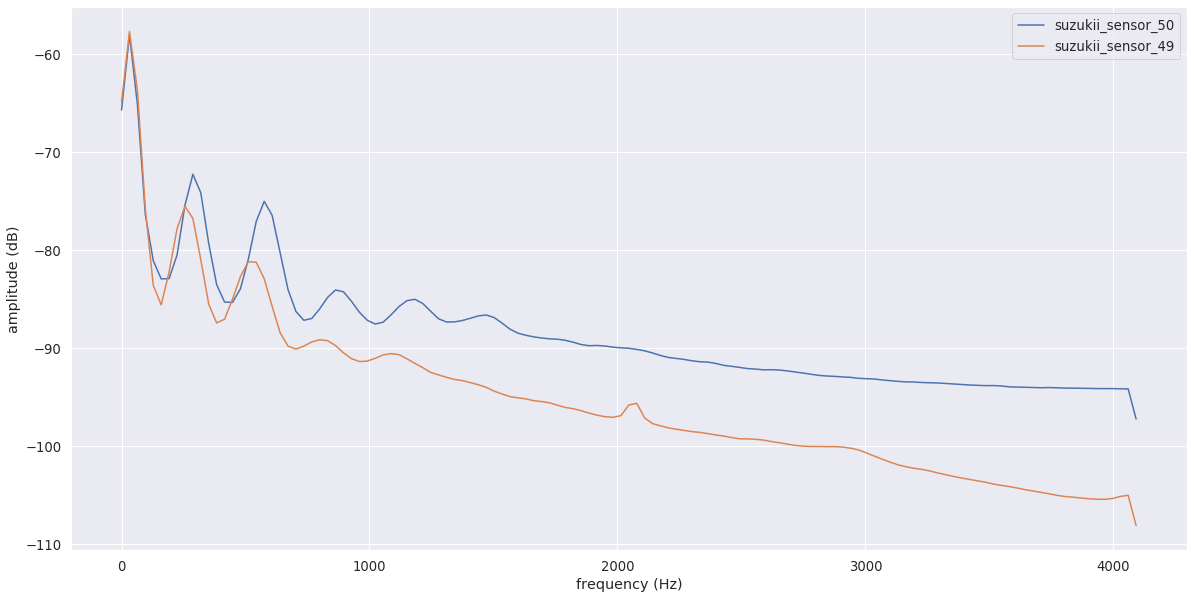

In [10]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_4', data2='Exp_swd_dmel_4', species1='D. suzukii', species2='D. melanogaster')

plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x1.mean(), "frequency (Hz)":freqs}))
sns.lineplot(y='amplitude (dB)', x='frequency (Hz)', data=pd.DataFrame({"amplitude (dB)": x2.mean(), "frequency (Hz)":freqs}))
plt.legend(['suzukii_sensor_50','suzukii_sensor_49'])
pd.DataFrame([x1.mean() - x2.mean()]).head(15)

# WORK IN PROGRESS

# PCA analysis on any of the above

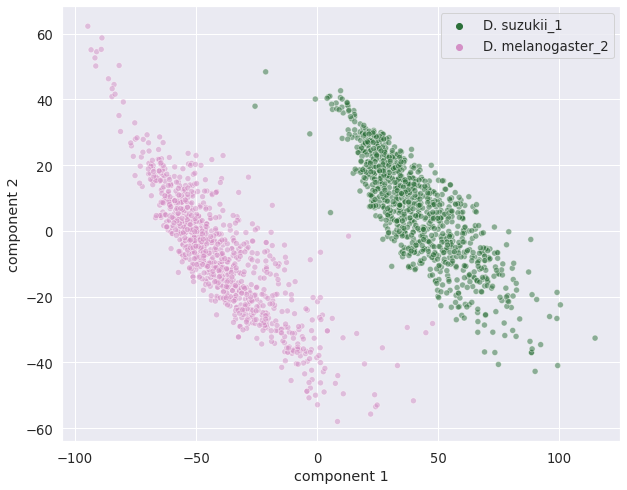

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = pd.concat([x1, x2])
y = pd.concat([y1, y2])

X_std = StandardScaler(with_std=False).fit_transform(X)  # standardization of data

pca = PCA(n_components=2)

X_final =pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                hue=y,
                palette=sns.color_palette("cubehelix", 2)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# -------------------------------------------------------------------------------------------------------------------------------

# Check combination 3 data which seemed to have mixed insects in one class

In [12]:
data = Dataset('Exp_swd_dmel_3')
data.read(loadmat=False)
data.get_sensor_features()
data.make_array(setting='psd_dB');
data.make_array(setting='raw');
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.psd_dB['y_dates'] = data.df_features[['date_day']]
data.psd_dB['y'] = data.y

Species: all.
Read 2000 filenames in 0.01 seconds.


## PCA on one insect, coloring based on 'hour' OR 'day' collected

In [13]:
selection = 'D. suzukii'
sub = data.psd_dB
sub['y_hours'] = data.df_features[['date_hour']]
sub = sub[sub.y == f'{selection}']
print(f'selected insect: {selection}')

selected insect: D. suzukii


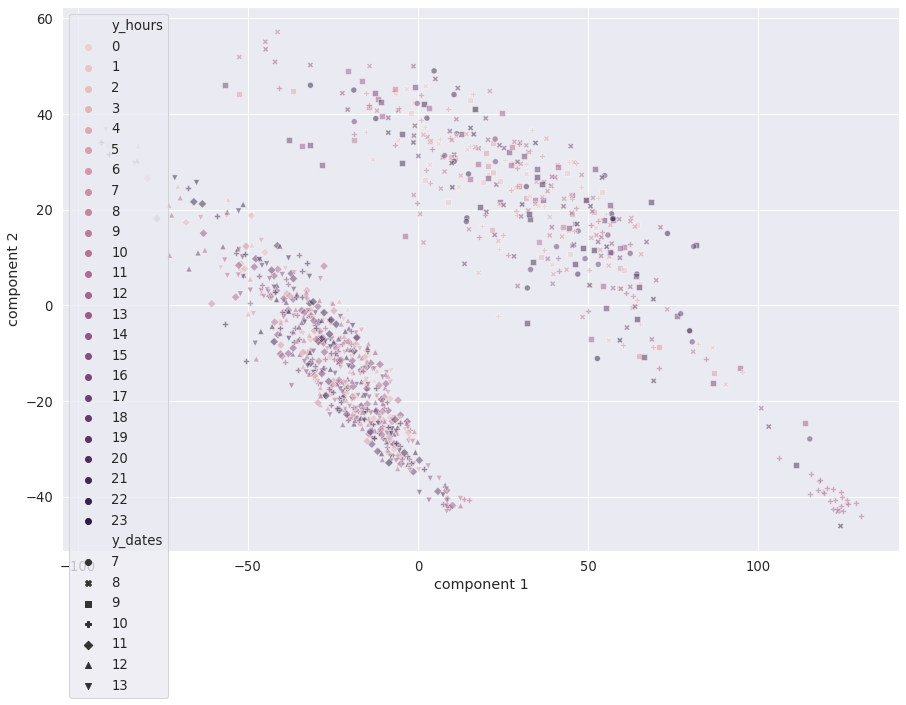

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = sub.iloc[:,:-3].values

X_std = StandardScaler(with_std=False).fit_transform(X)  # standardization of data (using covariance matrix)

pca = PCA(n_components=2)

X_final =pca.fit_transform(X_std)

plt.figure(figsize=(15,10))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                style=sub.y_dates,
#                 size=sub.y_hours,
                hue=sub.y_hours, # HERE SELECT HOURS OR DAYS
               )#palette=sns.color_palette("cubehelix", 8)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

## PCA on both insects

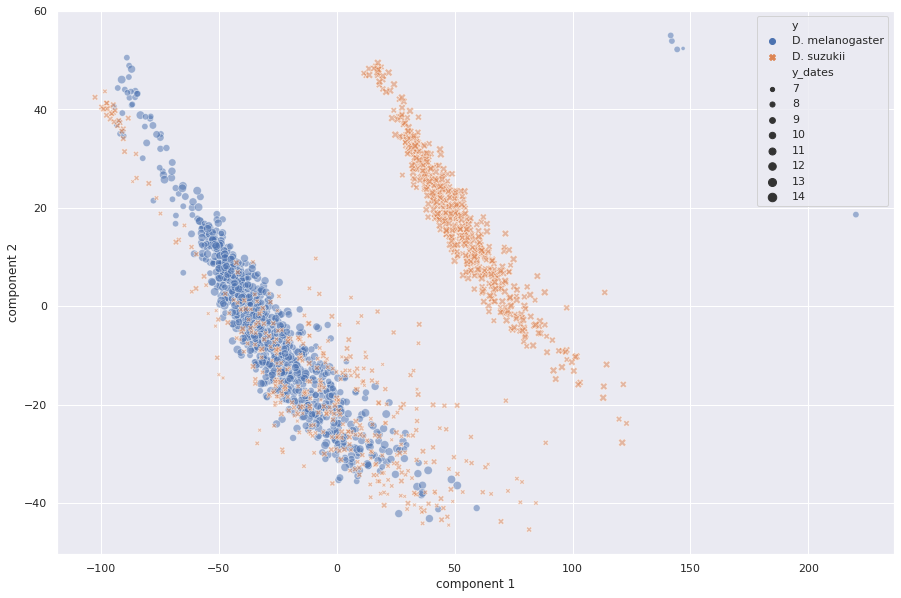

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.psd_dB.iloc[:,:-2].values

X_std = StandardScaler(with_std=False).fit_transform(X)  # standardization of data (using covariance matrix)

pca = PCA(n_components=2)

X_final =pca.fit_transform(X_std)

plt.figure(figsize=(15,10))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                style=data.psd_dB.y,
                size=data.psd_dB.y_dates,
                hue=data.psd_dB.y,
               )#palette=sns.color_palette("cubehelix", 8)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### same figure different style

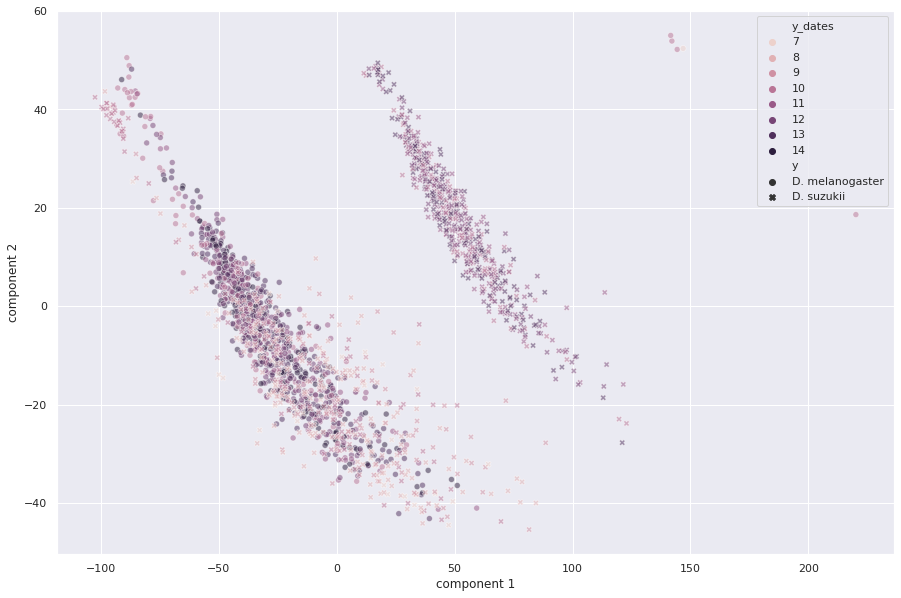

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                style=data.psd_dB.y,
#                 size=data.psd_dB.y_dates,
                hue=data.psd_dB.y_dates,
               )#palette=sns.color_palette("cubehelix", 8)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [15]:
data.df_features['y'] = data.y

In [16]:
data.df_features[data.df_features.y == 'D. suzukii'].date_day.value_counts()

10    197
13    167
11    165
8     165
12    161
9     105
7      40
Name: date_day, dtype: int64

In [17]:
data.df_features[data.df_features.y == 'D. melanogaster'].date_day.value_counts()

13    315
12    194
14    175
11    160
10    155
7       1
Name: date_day, dtype: int64

# -------------------------------------------------------------------------------------------

# All data together - Build predictive model

In [93]:
print(os.listdir(BASE_DIR))

data1 = Dataset('Exp_swd_dmel_1'); data1.read(loadmat=False); data1.make_array(setting='psd_dB');
data2 = Dataset('Exp_swd_dmel_2'); data2.read(loadmat=False); data2.make_array(setting='psd_dB');
data3 = Dataset('Exp_swd_dmel_3'); data3.read(loadmat=False); data3.make_array(setting='psd_dB');
data4 = Dataset('Exp_swd_dmel_4'); data4.read(loadmat=False); data4.make_array(setting='psd_dB');

['Exp_swd_dmel_4', 'Leafminers', 'Wingbeats', 'Exp_swd_dmel_2', 'Exp_swd_dmel_1', 'Pcfruit', 'Thomas', 'LG', 'Exp_swd_dm_before', 'Exp_swd_dmel_3']
Species: all.
Read 1200 filenames in 0.00 seconds.
Species: all.
Read 1260 filenames in 0.00 seconds.
Species: all.
Read 2000 filenames in 0.00 seconds.
Species: all.
Read 1950 filenames in 0.01 seconds.


In [94]:
data1.psd_dB['sensor'] = data1.y.apply(lambda x: f'49' if x == 'D. melanogaster' else f'50')
data2.psd_dB['sensor'] = data2.y.apply(lambda x: f'49' if x == 'D. melanogaster' else f'50')
data3.psd_dB['sensor'] = data3.y.apply(lambda x: f'50' if x == 'D. melanogaster' else f'49')
data4.psd_dB['sensor'] = data4.y.apply(lambda x: f'50' if x == 'D. melanogaster' else f'49')
data1.psd_dB['y'] = data1.y
data2.psd_dB['y'] = data2.y
data3.psd_dB['y'] = data3.y
data4.psd_dB['y'] = data4.y

In [95]:
df = pd.concat([data1.psd_dB, data2.psd_dB, data3.psd_dB, data4.psd_dB])
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['sensor'] = le.fit_transform(X['sensor'])
X.columns = pd.Series(X.columns).apply(lambda x: f'frequency_bin_{x}' if not str(x).endswith('sor') else x)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

estimator = XGBClassifier(n_estimators=150, n_jobs=8) #LogisticRegression(solver='lbfgs', n_jobs=-1)
estimator.fit(X_train, y_train)
# np.mean(cross_val_score(estimator, X, y, cv=5))
y_pred = estimator.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.tolist(), y_pred)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Melanogaster', 'Suzukii'], yticklabels=['Melanogaster', 'Suzukii'])

In [81]:
feature_importances = pd.DataFrame(estimator.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [82]:
print(feature_importances.shape)
feature_importances.head(10)

(130, 1)


,importance
frequency_bin_19,0.132116
frequency_bin_10,0.045235
frequency_bin_7,0.030149
frequency_bin_76,0.029058
sensor,0.025975
frequency_bin_77,0.025960
frequency_bin_6,0.025653
frequency_bin_74,0.021911
frequency_bin_14,0.021438
frequency_bin_1,0.020282


## FROM SAME SENSOR

In [155]:
print(os.listdir(BASE_DIR))

data1 = Dataset('Exp_swd_dmel_1'); data1.read(loadmat=False, data='D. suzukii'); data1.make_array(setting='psd_dB');
data2 = Dataset('Exp_swd_dmel_2'); data2.read(loadmat=False, data='D. suzukii'); data2.make_array(setting='psd_dB');
data3 = Dataset('Exp_swd_dmel_3'); data3.read(loadmat=False, data='D. melanogaster'); data3.make_array(setting='psd_dB');
data4 = Dataset('Exp_swd_dmel_4'); data4.read(loadmat=False, data='D. melanogaster'); data4.make_array(setting='psd_dB');

['Exp_swd_dmel_4', 'Leafminers', 'Wingbeats', 'Exp_swd_dmel_2', 'Exp_swd_dmel_1', 'Pcfruit', 'Thomas', 'LG', 'Exp_swd_dm_before', 'Exp_swd_dmel_3']
Species: D. suzukii.
Read 600 filenames in 0.01 seconds.
Species: D. suzukii.
Read 630 filenames in 0.01 seconds.
Species: D. melanogaster.
Read 1000 filenames in 0.01 seconds.
Species: D. melanogaster.
Read 980 filenames in 0.01 seconds.


In [156]:
data1.psd_dB['y'] = data1.y.values
data2.psd_dB['y'] = data2.y.values
data3.psd_dB['y'] = data3.y.values
data4.psd_dB['y'] = data4.y.values

In [157]:
df = pd.concat([data1.psd_dB, data2.psd_dB, data3.psd_dB, data4.psd_dB])
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [158]:
le = LabelEncoder()
y = le.fit_transform(y)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [167]:
#X_train.shape[0] + y_test.shape[0]
X.shape

(3210, 129)

0.8402489626556017


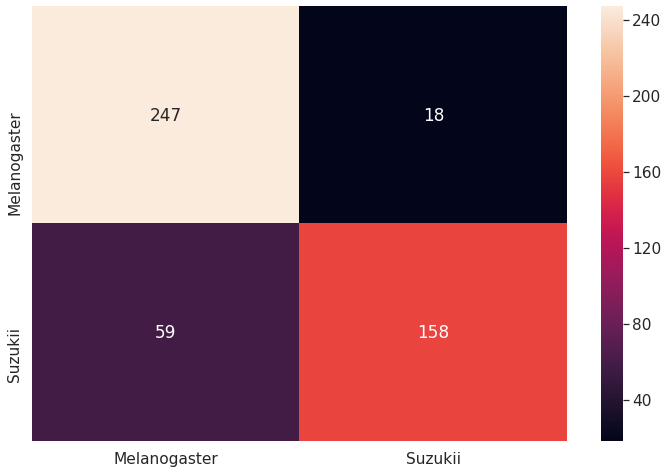

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


estimator = XGBClassifier(n_estimators=150, n_jobs=8) #LogisticRegression(solver='lbfgs', n_jobs=-1)
estimator.fit(X_train, y_train)
# np.mean(cross_val_score(estimator, X, y, cv=5))
y_pred = estimator.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.tolist(), y_pred)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Melanogaster', 'Suzukii'], yticklabels=['Melanogaster', 'Suzukii'])

print(estimator.score(X_test, y_test))
# cv_score = cross_val_score(estimator, X, y, cv=5)
# print(cv_score)
# print(np.mean(cv_score))
# feature_importances = pd.DataFrame(estimator.feature_importances_,
#                                    index = X.columns,
#                                     columns=['importance']).sort_values('importance',ascending=False)
# print(feature_importances.shape)
# feature_importances.head(10)

## USING DEEPNET

In [170]:
from configs import ModelConfiguration

In [171]:
model = ModelConfiguration(model_setting='conv1d', data_setting='raw', target_names=['Suz','Mel']).config

############ INPUT SHAPE:(5000, 1)


In [172]:
traincf = TrainConfiguration(dataset=data1, setting='raw', model_name='dokimastiko')

In [173]:
traincf.batch_size

32

In [174]:
X_names = pd.concat([data1.filenames, data2.filenames, data3.filenames, data4.filenames]).tolist()
y_names = pd.concat([data1.y, data2.y, data3.y, data4.y]).tolist()

le = LabelEncoder()
y_names = le.fit_transform(y_names)

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_names, y_names, test_size=0.15, random_state=42)

In [179]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [180]:
train_stats = calculate_train_statistics(X_train=X_train, setting='raw')

In [181]:
h = model.fit_generator(train_generator(X_train, y_train, 
                                    batch_size=traincf.batch_size,
                                    target_names=traincf.target_names,
                                    setting=traincf.setting,
                                    preprocessing_train_stats=train_stats,
                                    using_conv2d=False),
                    steps_per_epoch = int(math.ceil(float(len(X_train)) / float(traincf.batch_size))),
                    epochs = traincf.epochs,
                    validation_data = valid_generator(X_val, y_val,
                                                        batch_size=traincf.batch_size,
                                                        target_names=traincf.target_names,
                                                        setting=traincf.setting,
                                                        preprocessing_train_stats=train_stats,
                                                        using_conv2d=False),
                    validation_steps=int(math.ceil(float(len(X_val))/float(traincf.batch_size))),
                    callbacks=traincf.callbacks_list)

Epoch 1/100
85/86 [============================>.] - ETA: 0s - loss: 0.4608 - accuracy: 0.7879
Epoch 00001: val_loss improved from inf to 1.14967, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/dokimastiko.h5
86/86 [==============================] - 7s 78ms/step - loss: 0.4573 - accuracy: 0.7885 - val_loss: 1.1497 - val_accuracy: 0.5498
Epoch 2/100
85/86 [============================>.] - ETA: 0s - loss: 0.3897 - accuracy: 0.8246
Epoch 00002: val_loss improved from 1.14967 to 0.91692, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/dokimastiko.h5
86/86 [==============================] - 7s 76ms/step - loss: 0.3870 - accuracy: 0.8251 - val_loss: 0.9169 - val_accuracy: 0.4461
Epoch 3/100
85/86 [============================>.] - ETA: 0s - loss: 0.3699 - accuracy: 0.8360
Epoch 00003: val_loss did not improve from 0.91692
86/86 [==============================] - 7s 76ms/step - loss: 0.3674 - accuracy: 0.8365 - val_loss: 1.6244 - val_accuracy:

In [182]:
preds = model.predict_generator(valid_generator(X_val, y_val,
                                                        batch_size=traincf.batch_size,
                                                        target_names=traincf.target_names,
                                                        setting=traincf.setting,
                                                        preprocessing_train_stats=train_stats,
                                                        using_conv2d=False), 
                                verbose=True,
                                steps=int(math.ceil(float(len(X_val))/float(traincf.batch_size))))

16/16 [==============================] - 0s 20ms/step


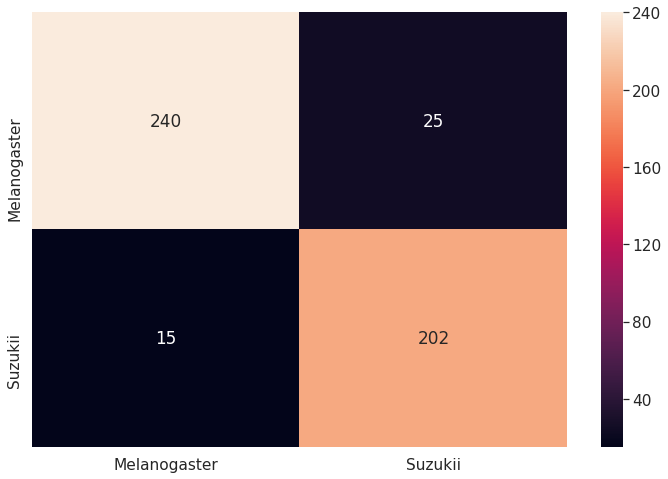

In [193]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_val, np.argmax(preds, axis=1))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Melanogaster', 'Suzukii'], yticklabels=['Melanogaster', 'Suzukii'])

In [189]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, np.argmax(preds,axis=1))

0.91701244813278

In [280]:
data = Dataset('LG')
data.read(data='all',loadmat=False)
data.make_array(setting='raw')

Species: all.
Read 12746 filenames in 0.07 seconds.


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
F180922_094113_030_G_120_T_25.9_H_66.3,-0.008606,-0.010132,-0.010590,-0.009430,-0.004059,-0.002289,-0.003876,-0.004700,-0.004822,-0.002472,...,0.001740,-0.002197,-0.001648,0.000366,0.001343,-0.000061,0.001770,0.001465,-0.002869,0.000885
F180922_094611_054_G_120_T_25.9_H_65.8,0.000092,0.000427,-0.001495,-0.000763,0.001068,-0.000793,0.001007,0.001434,0.001251,0.004578,...,-0.003357,-0.006775,-0.003967,-0.004120,-0.005859,-0.005096,-0.004730,-0.005005,-0.005310,-0.005341
F180922_094639_058_G_120_T_25.9_H_65.8,-0.008240,-0.005646,-0.007477,-0.008850,-0.006683,-0.007751,-0.007660,-0.005981,-0.003632,0.002136,...,0.002289,0.001434,0.003235,0.003296,0.004425,0.000000,0.001526,0.003265,0.001678,0.003296
F180922_094422_041_G_120_T_25.9_H_65.8,0.000183,-0.000549,-0.000031,0.000397,-0.000916,0.000763,0.001312,0.001251,0.000580,0.001923,...,0.002472,0.001617,0.000641,-0.001190,-0.000336,0.000824,0.002319,-0.000641,-0.001129,-0.002136
F180922_093115_251_G_120_T_25.9_H_66.3,0.068634,0.093384,0.108185,0.118591,0.112885,0.075775,0.042755,0.019226,0.007629,0.004913,...,0.012665,-0.007416,-0.023254,-0.027954,-0.033630,-0.039886,-0.041565,-0.045807,-0.037262,-0.026276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F180905_194051_195_G_120,-0.000488,0.001099,0.000854,-0.001312,-0.000702,0.000244,0.000580,-0.001282,0.000214,0.001373,...,-0.001740,-0.000427,-0.001617,0.000793,-0.001282,-0.000366,-0.000610,-0.001373,0.000488,0.000854
F180905_190033_185_G_120,-0.001373,0.000610,-0.002594,-0.001526,-0.001923,-0.001862,-0.000214,0.002228,0.000946,0.000244,...,-0.001129,-0.000519,-0.001434,0.000214,-0.000336,0.001251,0.001251,0.000763,-0.000641,-0.000946
F180905_191350_186_G_120,0.004059,0.004547,0.007355,0.006042,0.003174,0.004974,0.003693,-0.000092,0.002625,0.005554,...,-0.004913,0.001495,0.004761,0.010803,0.013000,0.010773,0.007538,0.005951,0.003326,-0.000671
F180905_182918_169_G_120,-0.001282,0.001770,-0.001312,0.001038,-0.000916,-0.002106,-0.000244,0.000916,0.002441,-0.001251,...,0.000427,-0.000244,-0.000671,-0.000214,-0.000061,-0.000153,-0.000305,0.001038,0.001007,0.000458


8010


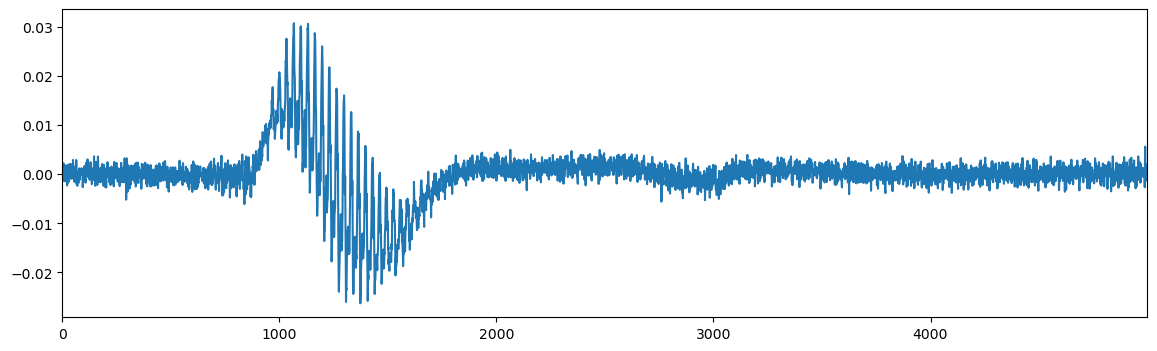

In [302]:
# plt.figure(fi)
# sns.reset_orig()
# i = 8000
i +=1
print(i)
data.raw.iloc[i].plot(figsize=(14,4))